In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import Symbol, Derivative, sin, cos, tan
import sympy as sym

import seaborn as sns
import random

from numpy import linalg as la

from scipy.optimize import minimize
%matplotlib inline

###### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [7]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10],])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [8]:
# Функция подсчета косинусного расстояния между векторами a, b по их координатам длины векторов
def cos_range(a,b):
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

# Функция поиска наиболее похожего профиля
def get_alike_profile(user_profiles, target_index=0):
    pair_index = len(user_profiles) + 1
    max_cos_range = 0
    max_cos_num = 0
    cur_cos_range = 0.0
    
    for i in range(len(user_profiles)):
        if i == target_index:
            continue
            
        cur_cos_range = cos_range(user_profiles[target_index], user_profiles[i])
        
        if cur_cos_range > max_cos_range:
            max_cos_range = cur_cos_range
            pair_index = i
    
    return pair_index

user_pairs = []

# Проходим по всем векторам в матрице и для каждого определяем наиболее похожий
for profile_num in range(len(raitings)):
    user_pairs.append([profile_num,get_alike_profile(raitings,profile_num)])

# Пары сохраняем как индексы соответствующих строк в матрице
user_pairs

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 0],
 [9, 2]]

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(raitings)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
raitings_pca = pca.transform(raitings)
raitings_pca

user_pairs = []

# Проходим по всем векторам в матрице и для каждого определяем наиболее похожий
for profile_num in range(len(raitings_pca)):
    user_pairs.append([profile_num,get_alike_profile(raitings_pca,profile_num)])

# Пары сохраняем как индексы соответствующих строк в матрице
user_pairs

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 6],
 [4, 1],
 [5, 7],
 [6, 3],
 [7, 5],
 [8, 0],
 [9, 8]]

###### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

$f'(x) = 2*tg(sin(x)+cos(2x+3))*(tg(sin(x)+cos(2x+3)))'$

$(tg(sin(x)+cos(2x+3)))' = tg'(sin(x)+cos(2x+3))*(sin(x)+cos(2x+3))' = (1 / сos^2(sin(x)+cos(2x+3)) * (cos(x)-sin(2x+3)*2)$

$(1 / сos^2(sin(x)+cos(2x+3)) * (cos(x)-sin(2x+3)*2) = (1 + tg^2(sin(x)+cos(2x+3))*(cos(x)-sin(2x+3)*2)$

$f'(x) = 2*tg(sin(x)+cos(2x+3)) * (1 + tg^2(sin(x)+cos(2x+3))*(cos(x)-2sin(2x+3))$

Значение производной в точке 1:

$f'(1) = 2*tg(sin(1)+cos(5)) * (1 + tg^2(sin(1)+cos(5))*(cos(1)-2sin(5))$

$f'(1) = 2*tg(0.842+0.284)*(1 + tg^2(0.842+0.284)) * (0.540-(-0.959)*2))$

$f'(1) = 2 * 2.098 * (1 + (2.098)^2) * (2.458))$

$f'(1) = 2 * 2.093 * (5.382) * (2.458))$

$f'(1) = 55.386$

In [5]:
x = Symbol('x')

# Задаем исходную функцию
function = tan(sin(x) + cos(2*x + 3))*tan(sin(x) + cos(2*x + 3))

# Получаем первую производную
deriv = Derivative(function).doit()
print('Производная:')
deriv

Производная:


2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [6]:
print(f'Значение производной в точке 1: {deriv.evalf(subs={x:1})}')

Значение производной в точке 1: 55.3859176353379


###### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [7]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [8]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [9]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

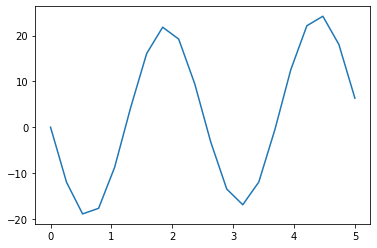

In [10]:
plt.plot(x, fx)
plt.show()

In [11]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [120]:
error([3,-2.5])

1.5163282505170628e-06

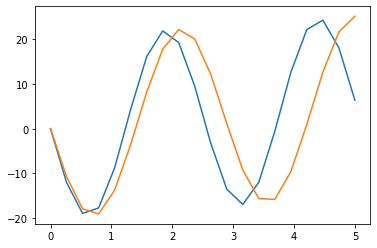

Используем функцию minimize из модуля scipy для подбора оптимальных параметров. Можно попробовать разные методы для
определения наиболее подходящего. Кроме того необходимо подобрать стартовые параметры - удачным вариантом оказались значения [1,-1]

In [128]:
methods = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP']

x0 = np.array([1,-1])

for cur_method in methods:
    res = minimize(error, x0, method=cur_method,options={'disp': True})
    print(cur_method)
    print(res.x)

Optimization terminated successfully.
         Current function value: 236.985677
         Iterations: 56
         Function evaluations: 108
Nelder-Mead
[ 2.31151256 -0.95858203]
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 7
         Function evaluations: 348
Powell
[ 3.  -2.5]
         Current function value: 240.341164
         Iterations: 1
         Function evaluations: 235
         Gradient evaluations: 58
CG
[ 1.0154763  -0.88538885]
         Current function value: 237.029451
         Iterations: 37
         Function evaluations: 888
         Gradient evaluations: 219
BFGS
[ 2.3851313  -0.97746939]
L-BFGS-B
[ 1.86135079 -0.75924217]
TNC
[ 1.97267034 -0.83226193]
COBYLA
[ 2.10668476 -0.89260122]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 236.98567696062304
            Iterations: 29
            Function evaluations: 185
            Gradient evaluations: 29
SLSQP
[ 2.31140503 -

C:\Users\Peter\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Peter\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Метод 'Powell' подобрал точные значения [3, -2.5], которые дают нулевую ошибку. Попробуем сравнить результат с исходной функцией - видим, что значения fx совпадают с иходными

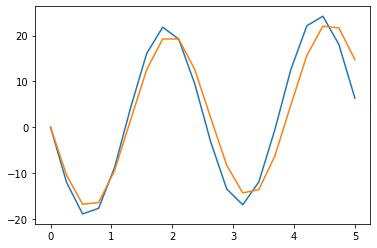

In [131]:
f_pred = []
for cur_x in x:
# Возьмем немного другие параметры, иначе графики наложатся
    f_pred.append(f(cur_x,2.9,-2.4))

plt.plot(x, fx)
plt.plot(x, f_pred)
plt.show()


###### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

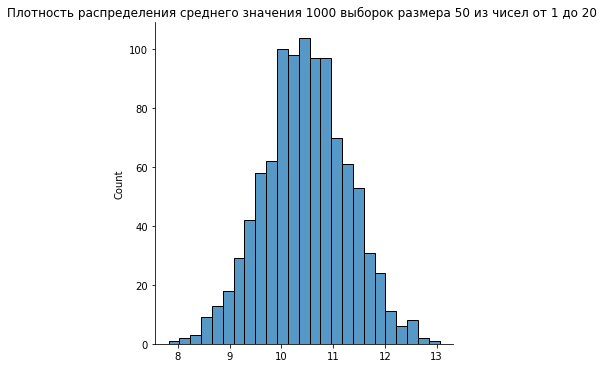

In [12]:
def value_roll_sum(n = 50):
    value = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    value_sum = 0
    i=0

    while i < n:
        value_sum += random.choice(value)    
        i += 1;
        
    return value_sum

def value_roll_avg(cycle_num=1000, rolls=50):
    value_avg_list = []
    i=0
    
    while i < cycle_num:
        value_avg_list.append(value_roll_sum(rolls)/rolls)
        i+=1
        
    return value_avg_list

sns.displot(value_roll_avg(1000,50))
plt.title('Плотность распределения среднего значения 1000 выборок размера 50 из чисел от 1 до 20 ')
plt.show()

###### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

###### Найдем собственные значения и собственные вектора матрицы вручную

1. Воспользуемся формулой для поиска собственных значений матрицы:

\begin{equation*}
(A-\lambda I)\bar{v} = \bar{0}
\end{equation*}

\begin{equation*}
det(A-\lambda I) = 0
\end{equation*}

\begin{equation*}
\begin{vmatrix}
1-\lambda & 4 \\
1 & 1-\lambda 
\end{vmatrix}
=0
\end{equation*}

\begin{equation*}
(1-\lambda)(1-\lambda) - (1 * 4) = 0 
\end{equation*}

\begin{equation*}
\lambda^2 - 2\lambda - 3 = 0 
\end{equation*}


\begin{equation*}
\lambda_1 = -1 ,
\lambda_2 = 3
\end{equation*}

2. Найдем собственные вектора

1) $\lambda = -1 $

\begin{equation*}
\begin{vmatrix}
1+1 & 4 \\
1 & 1+1 
\end{vmatrix}
\begin{vmatrix}
x \\
y  
\end{vmatrix}
= 0
\end{equation*}

\begin{equation}
x = -2y
\end{equation}

Пример собственного вектора:

\begin{equation}
\begin{vmatrix}
-2 \\
1  
\end{vmatrix}
\end{equation}

1) $\lambda = 3 $

\begin{equation*}
\begin{vmatrix}
1+3 & 4 \\
1 & 1+3 
\end{vmatrix}
\begin{vmatrix}
x \\
y  
\end{vmatrix}
= 0
\end{equation*}

\begin{equation}
x = 2y
\end{equation}

Пример собственного вектора:

\begin{vmatrix}
2 \\
1  
\end{vmatrix}


###### Найдем собственные значения и собственные вектора матрицы с помощью linalg

In [14]:
arr = np.array([[1,4],[1,1]])
arr

array([[1, 4],
       [1, 1]])

In [21]:
w, v = la.eig(arr)
w,v

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))